In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:03<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2611 - loss: 1.8047 - val_accuracy: 0.3921 - val_loss: 1.6030
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.3829 - loss: 1.5836 - val_accuracy: 0.4290 - val_loss: 1.4829
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4291 - loss: 1.4866 - val_accuracy: 0.4604 - val_loss: 1.4183
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4560 - loss: 1.4252 - val_accuracy: 0.4762 - val_loss: 1.3718
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.4708 - loss: 1.3864 - val_accuracy: 0.4849 - val_loss: 1.3441
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.4873 - loss: 1.3377 - val_accuracy: 0.4987 - val_loss: 1.3313
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4943 - loss: 1.3126 - val_accuracy: 0.5043 - val_loss: 1.3049
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5029 - loss: 1.2931 - val_accuracy

Test Accuracy: 0.55


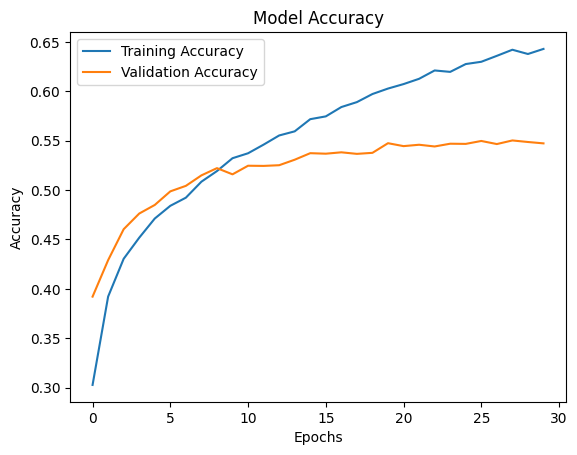

In [6]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Print the dataset path
print("Path to dataset files:", path)

# Paths to train and test directories
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

# Create ImageDataGenerators for training and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% validation split
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("fer2013_cnn_model.h5")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Prediction function
def predict_emotion(image_path, model_path="fer2013_cnn_model.h5"):
    from tensorflow.keras.models import load_model
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # Load the trained model
    model = load_model(model_path)

    # Preprocess the image
    image = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Predict the emotion
    predictions = model.predict(image)
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotions[np.argmax(predictions)]
    return predicted_emotion


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


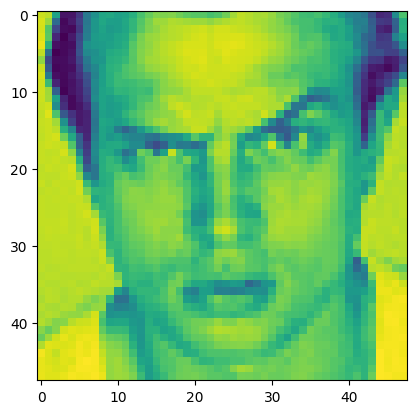

Predicted Emotion: Sad


In [9]:
emotion = predict_emotion('/PrivateTest_1623042.jpg')
import matplotlib.pyplot as plt
# Import the image using imread
img = plt.imread('/PrivateTest_1623042.jpg')
# Display the image
plt.imshow(img)
plt.show()  # Add plt.show() to display the image
print("Predicted Emotion:", emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


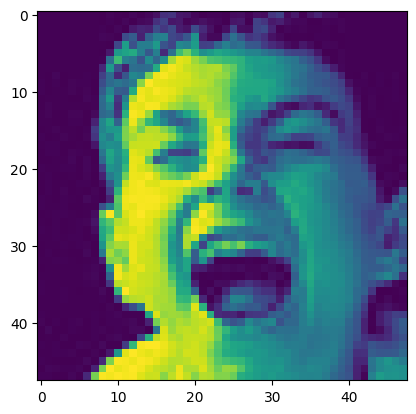

Predicted Emotion: Happy


In [10]:
emotion = predict_emotion('/PrivateTest_14325168.jpg')
import matplotlib.pyplot as plt
# Import the image using imread
img = plt.imread('/PrivateTest_14325168.jpg')
# Display the image
plt.imshow(img)
plt.show()  # Add plt.show() to display the image
print("Predicted Emotion:", emotion)